In [ ]:
%matplotlib notebook

from random import randint
import pandas as pd
import os
import tensorflow_addons as tfa
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import math
from numpy import savetxt
from numpy import linalg as LA
import seaborn as sns
import matplotlib
from matplotlib import font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_dirs = ["/Times_New_Roman"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
custom_font_manager = font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
result = font_manager.fontManager.findfont('Times New Roman')
print(result)
plt.rcParams["font.family"] = "Times New Roman"
font = {'size'   : 12}
matplotlib.rc('font', **font)

# from sklearn.model_selection import train_test_split
# import tensorflow.keras.backend as K
# from tensorflow.keras.optimizers import RMSprop
# import tensorflow_addons as tfa
# from tensorflow.python.client import device_lib
import tensorflow as tf
# import time
import setproctitle as SP
# rom sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
# from tensorflow import keras
# from tensorflow.keras.layers import Activation, Conv1D, Input, Flatten, Dense, BatchNormalization, ReLU, Dropout, MaxPooling1D, GlobalAveragePooling1D
# from tensorflow.keras.losses import Huber, MeanSquaredError, huber
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# from tensorflow import keras
# import tensorflow.keras.losses
# # from keras.regularizers import l2
# # from keras import backend as K
# import keras_tuner as kt
# from keras_tuner.tuners import RandomSearch,Sklearn,BayesianOptimization,Hyperband
# from tensorflow.keras import layers, models
# from keras_tuner.engine.hyperparameters import HyperParameters
# from hyperopt import hp
# from tensorflow.keras.layers import Lambda

In [51]:
def Tip_RMSE(y_test_GT,y_test_pred_F,marker):
    [n_ts,m_ts]=y_test_GT.shape

    TipError=np.zeros((n_ts))
    RMSE=np.zeros((n_ts))
    EuclideanDistance=np.zeros((n_ts,20))

    for i in range (0,n_ts):
        M1=y_test_GT[i,0:3];
        M2=y_test_GT[i,3:6];
        M3=y_test_GT[i,6:9];
        M4=y_test_GT[i,9:12];
        M5=y_test_GT[i,12:15];
        M6=y_test_GT[i,15:18];
        M7=y_test_GT[i,18:21];
        M8=y_test_GT[i,21:24];
        M9=y_test_GT[i,24:27];
        M10=y_test_GT[i,27:30];
        M11=y_test_GT[i,30:33];
        M12=y_test_GT[i,33:36];
        M13=y_test_GT[i,36:39];
        M14=y_test_GT[i,39:42];
        M15=y_test_GT[i,42:45];
        M16=y_test_GT[i,45:48];
        M17=y_test_GT[i,48:51];
        M18=y_test_GT[i,51:54];
        M19=y_test_GT[i,54:57];
        M20=y_test_GT[i,57:60];
#         M21=y_test_GT[i,60:63];
    # 
        MP1=y_test_pred_F[i,0:3];
        MP2=y_test_pred_F[i,3:6];
        MP3=y_test_pred_F[i,6:9];
        MP4=y_test_pred_F[i,9:12];
        MP5=y_test_pred_F[i,12:15];
        MP6=y_test_pred_F[i,15:18];
        MP7=y_test_pred_F[i,18:21];
        MP8=y_test_pred_F[i,21:24];
        MP9=y_test_pred_F[i,24:27];
        MP10=y_test_pred_F[i,27:30];
        MP11=y_test_pred_F[i,30:33];
        MP12=y_test_pred_F[i,33:36];
        MP13=y_test_pred_F[i,36:39];
        MP14=y_test_pred_F[i,39:42];
        MP15=y_test_pred_F[i,42:45];
        MP16=y_test_pred_F[i,45:48];
        MP17=y_test_pred_F[i,48:51];
        MP18=y_test_pred_F[i,51:54];
        MP19=y_test_pred_F[i,54:57];
        MP20=y_test_pred_F[i,57:60];
#         MP21=y_test_pred_F[i,60:63];

    #     
        EuclideanDistance[i,:]=[LA.norm(MP1-M1),LA.norm(MP2-M2),LA.norm(MP3-M3),LA.norm(MP4-M4),LA.norm(MP5-M5),LA.norm(MP6-M6)
                                  ,LA.norm(MP7-M7),LA.norm(MP8-M8),LA.norm(MP9-M9),LA.norm(MP10-M10),LA.norm(MP11-M11)
                                  ,LA.norm(MP12-M12),LA.norm(MP13-M13),LA.norm(MP14-M14),LA.norm(MP15-M15),LA.norm(MP16-M16)
                                  ,LA.norm(MP17-M17),LA.norm(MP18-M18),LA.norm(MP19-M19),LA.norm(MP20-M20)];
    
        
        TipError[i]=EuclideanDistance[i,marker]
        RMSE[i]=tf.sqrt(tf.math.reduce_mean(tf.square(EuclideanDistance[i,0:marker+1])))
#         TipError[i]=LA.norm(MP20-M20)
#         RMSE[i]=tf.sqrt(tf.math.reduce_mean(tf.square(EuclideanDistance[i,:])))
    inq_TE=np.quantile(TipError,[0.25, 0.75])
    upper_bound_TE = inq_TE[1]+(1.5*(inq_TE[1]-inq_TE[0]))
    lower_bound_TE = inq_TE[0]-(1.5*(inq_TE[1]-inq_TE[0]))
    Outliers_TE=TipError[(TipError <= lower_bound_TE) | (TipError >= upper_bound_TE)]
    
    inq_RMSE=np.quantile(RMSE,[0.25, 0.75])
    upper_bound_RMSE = inq_RMSE[1]+(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    lower_bound_RMSE = inq_RMSE[0]-(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    Outliers_RMSE=RMSE[(RMSE <= lower_bound_RMSE) | (RMSE >= upper_bound_RMSE)]
    

    print([np.mean(TipError),np.median(TipError),inq_TE[1]-inq_TE[0],len(Outliers_TE)],'Tip Error')
    print([np.mean(RMSE),np.median(RMSE),inq_RMSE[1]-inq_RMSE[0],len(Outliers_RMSE)],'RMSE')
    
        
#     print([tf.math.reduce_mean(TipError),tf.math.reduce_mean(RMSE)])
    green_diamond = dict(marker='D',markeredgecolor='0.7', markersize=3)#markerfacecolor=None, , alpha=0.6
    medianprops = dict(linewidth=1.5)
    
#     plt.figure(figsize=(3,4))
#     plt.boxplot([TipError,RMSE],labels=['Tip Error','RMSE'],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylabel('Error [mm]')
#     plt.grid(b=True, which='both', axis='both', color='0.95')
#     plt.ylim(top=100,bottom=-1)
#     plt.tight_layout()
# #     plt.savefig('TipRMSE.svg',format='svg')

    plt.figure(figsize=(8,4))
    plt.boxplot(EuclideanDistance[:,:],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylim(top=100,bottom=-1)
    plt.ylabel('Error [mm]')
    plt.xlabel('Marker')
    plt.grid(b=True, which='both', axis='both', color='0.95')
    plt.tight_layout()
#     plt.savefig('EUC.svg',format='svg')
 
# def skip_diag_masking(A):
#     return A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)

# def skip_diag_broadcasting(A):
#     m = A.shape[0]
#     idx = (np.arange(1,m+1) + (m+1)*np.arange(m-1)[:,None]).reshape(m,-1)
#     return A.ravel()[idx]

# def skip_diag_strided(A):
#     m = A.shape[0]
#     strided = np.lib.stride_tricks.as_strided
#     s0,s1 = A.strides
#     return strided(A.ravel()[1:], shape=(m-1,m), strides=(s0+s1,s1)).reshape(m,-1)


def Rel2Abs(pred_Relative):
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]
    return pred_Absolute
                


# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    """Set 3D plot axes to equal scale.

    Make axes of 3D plot have equal scale so that spheres appear as
    spheres and cubes as cubes.  Required since `ax.axis('equal')`
    and `ax.set_aspect('equal')` don't work on 3D.
    """
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

from numba import jit, cuda
# from numba import vectorize

# @cuda.jit('float32(float32, float32)', device=True)
def RMSE_calculations(Y_test,Y_train):
    n=Y_test.shape[0]
    m=Y_train.shape[0]

    RMSE=np.zeros((n,m))

    for j in range(0,n):
#         print(j)
        for i in range(0,m):
            RMSE[j,i]=np.sqrt(np.mean(np.square(Y_test[j,:]-Y_train[i,:])))
#     print(RMSE.shape)
#     RMSE=skip_diag_strided(RMSE)
    return RMSE 



def make_pairs(X,RMSE,limits):
#     pairs=[]
    labels=[]
    index_list=[]
    for anc in range(X.shape[0]):
        for p in range(anc+1,RMSE.shape[1]):
            
            if RMSE[anc,p]<limits[0]:#similar
#                 pairs.append([X[anc,:,:],X[p,:,:]])
                labels.append([0])
                index_list.append([anc,p])
                
            if RMSE[anc,p]>limits[1] and RMSE[anc,p]<limits[2]:#not similar
#                 pairs.append([X[anc,:,:],X[p,:,:]])
                labels.append([1])
                index_list.append([anc,p])
                
    return np.array(labels), np.array(index_list)#np.array(pairs), 

def Self_RMSE_calculations(Y):
    n=Y.shape[0]
    RMSE=np.zeros((n,n))

    for j in range(n): 
        for i in range(j+1,n):
            RMSE[j,i]=np.sqrt(np.mean(np.square(Y[j,:]-Y[i,:])))
#     print(RMSE.shape)
#     RMSE=skip_diag_strided(RMSE)
    return RMSE

def Distance(n_tr,X):
    Y = np.zeros((n_tr,20))
    for i in range(0,n_tr):
        for j in range(0,20):
            Y[i,j]=math.sqrt(np.square(X[i,3*j])+np.square(X[i,3*j+1])+np.square(X[i,3*j+2])) 
    return Y

@jit#('float32(float32, float32)', device=True)
def find_pairs(RMSE,limit,n,m):
    index_list=[]
    for anc in range(0,n):#(RMSE.shape[0]):
        for p in range(0,m):#(0,RMSE.shape[1]):

            if RMSE[anc,p]<limit:#similar
                index_list.append([anc,p])
                
                
    return np.array(index_list)

@jit#('float32(float32, float32)', device=True)
def find_counts(Count,limit,n):
    index_list=[]
    for anc in range(0,n):#(RMSE.shape[0]):
#         for p in range(0,m):#(0,RMSE.shape[1]):
            
        if Count[anc]>limit:#similar
            index_list.append([anc])
                
    return np.array(index_list)



In [5]:
# def euclidean_distance(x, y):
#     square=tf.math.square(x - y)
#     sum_square = tf.math.reduce_sum(square, axis=0, keepdims=True)
# #     print(square.shape)
#     return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))  

def Norm_calculations(X_test,X_train):
    n=X_test.shape[0]
    m=X_train.shape[0]
    LookupTable=np.zeros((n,m))#,dtype=tf.dtypes.float32)
#     print(LookupTable.shape)
    for j in range(0,n):
        print(j)
        for i in range(0,m):
#             print(i)
#             LookupTable[j,i]=euclidean_distance(X_test[j,:,1],X_train[i,:,1])
#             LookupTable[j,i]=tf.math.sqrt(tf.math.reduce_sum(tf.math.square(X_test[j,:] - X_train[i,:]), axis=0, keepdims=True))
            LookupTable[j,i]=np.sqrt(np.sum(np.square(X_test[j,:] - X_train[i,:]), axis=0, keepdims=True))
#     print(LookupTable.shape)
    return LookupTable 

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))



In [18]:
EUCdis_random_Avg3Scans_train_val = np.load('EUCdis_random_Avg3Scans_train_val.npy')

EUCdis_3min_1_Avg3Scans_train_val = np.load('EUCdis_3min_1_Avg3Scans_train_val.npy')

EUCdis_3min_2_Avg3Scans_train_val = np.load('EUCdis_3min_2_Avg3Scans_train_val.npy')


<IPython.core.display.Javascript object>


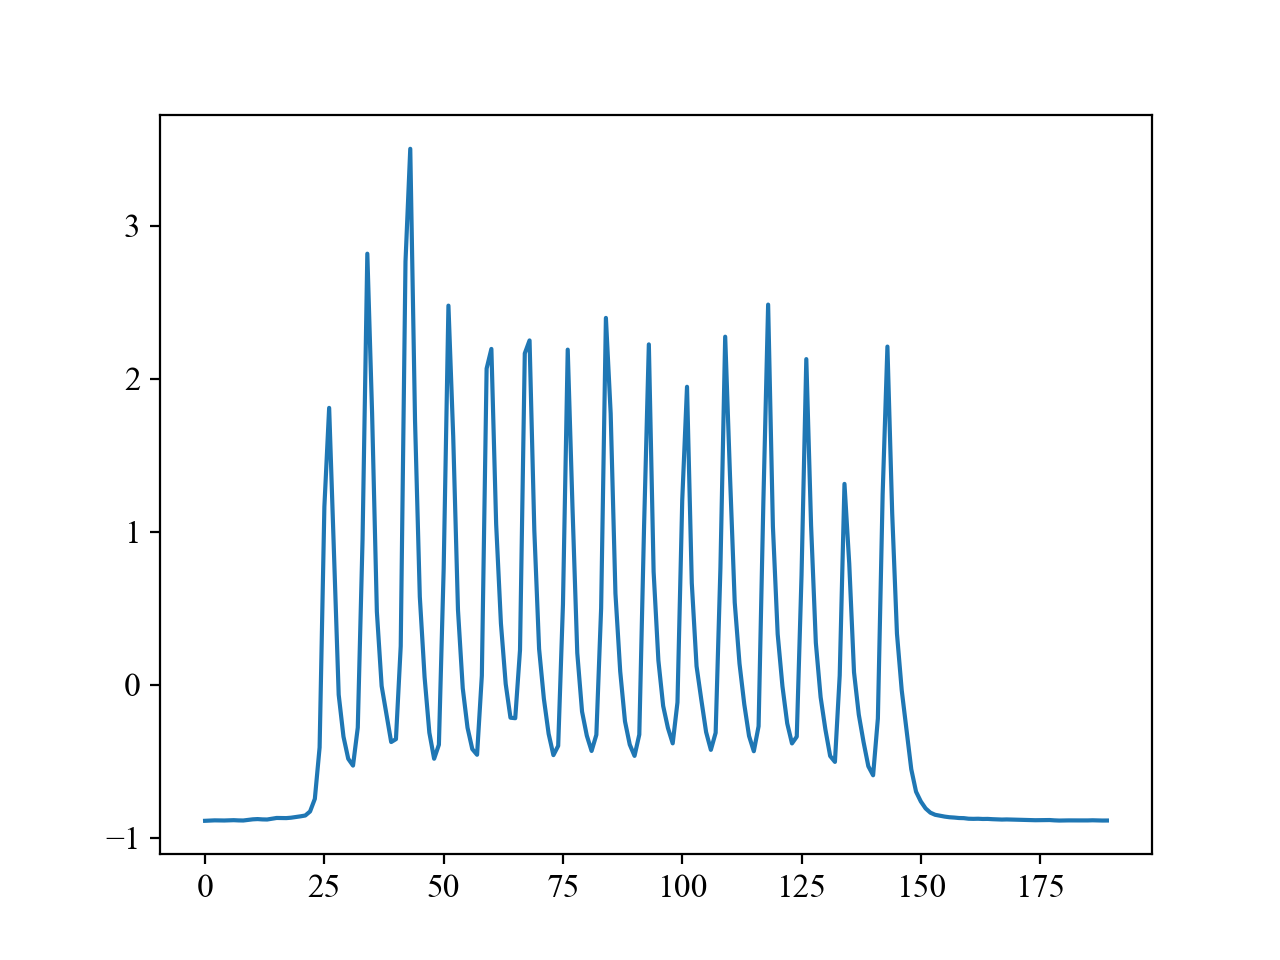

<IPython.core.display.Javascript object>


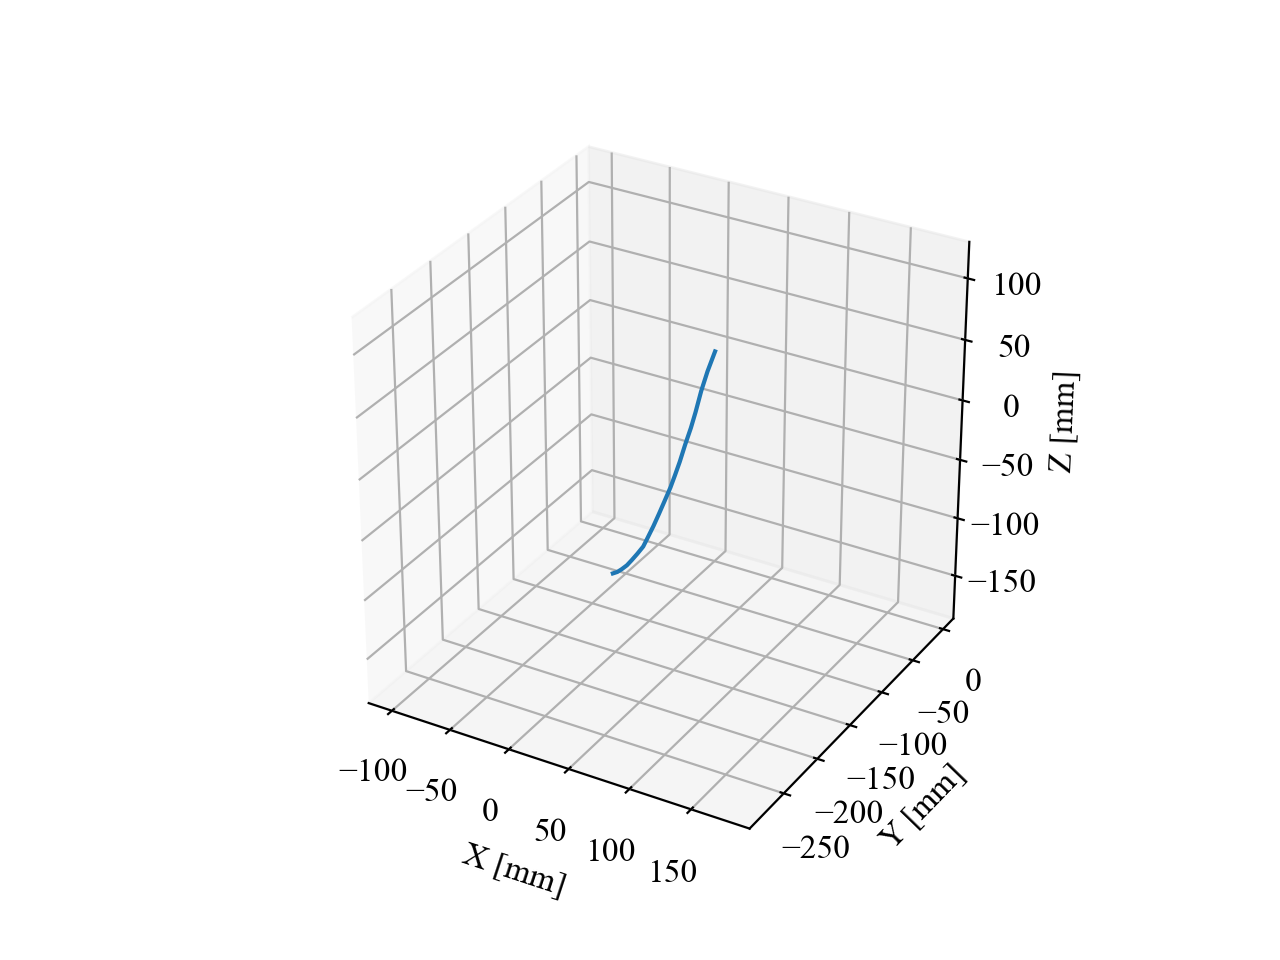

In [8]:

os.chdir("/data/samaneh.manavi/NaturePaper/data/RandomSplit")
Name='Norm_Relative_1606Random_10-05-2022--15-12'


x_train_std = genfromtxt('x_train_'+Name+'.csv', delimiter=';')
y_train_raw = genfromtxt('y_train_'+Name+'.csv', delimiter=';')
y_train_rand = Rel2Abs(y_train_raw)
x_train_rand = np.mean(np.reshape(x_train_std, (-1,190,3)),axis=2)

x_val_std = genfromtxt('x_val_'+Name+'.csv', delimiter=';')
y_val_raw = genfromtxt('y_val_'+Name+'.csv', delimiter=';')
y_val_rand = Rel2Abs(y_val_raw)
x_val_rand = np.mean(np.reshape(x_val_std, (-1,190,3)),axis=2)

x_TV_rand=np.concatenate((x_train_rand,x_val_rand),axis=0)
y_TV_rand=np.concatenate((y_train_rand,y_val_rand),axis=0)

print(x_TV_rand.shape)
print(y_TV_rand.shape)

# j=3000
# xyz=y_3min_1[j].reshape((20,3))

# fig = plt.figure()
# plt.plot(x_3min_1[j,:])
# fig.show()

# fig = plt.figure()
# ax= fig.gca(projection='3d')
# plt.ion()
# ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
# ax.set_box_aspect([1,1,1])
# set_axes_equal(ax)
# ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
# ax.set_ylabel('Y [mm]')
# ax.set_zlabel('Z [mm]')
# fig.show() 


In [64]:
# cheching if the method is valid
n1=2000
EUCdis_ValidityCheck = Norm_calculations(x_TV_rand[n1:n1+2,:],x_TV_rand[:,:])
matchin_signal=np.argmin(EUCdis_ValidityCheck, axis=-1)
print(matchin_signal)
# we can see that the function reports the correct index for the matching signal

0
1
[2000 2001]


In [20]:
os.chdir("/data/samaneh.manavi/NaturePaper/data/RandomSplit")
Name='Norm_Relative_1606Random_10-05-2022--15-12'
x_test_std = genfromtxt('x_test_'+Name+'.csv', delimiter=';')
y_test_raw = genfromtxt('y_test_'+Name+'.csv', delimiter=';')
y_test_rand = y_test_raw
x_test_rand = np.mean(np.reshape(x_test_std, (-1,190,3)),axis=2)

os.chdir("/data/samaneh.manavi/NaturePaper/data/3min_second")
Name='3min_Norm_10-05-2022--15-56_second'
x_3min_2_std = genfromtxt('x_'+Name+'.csv', delimiter=';')
y_3min_2 = genfromtxt('y_'+Name+'.csv', delimiter=';')
x_3min_2 = np.mean(np.reshape(x_3min_2_std, (-1,190,3)),axis=2)

os.chdir("/data/samaneh.manavi/NaturePaper/data/3min_first")
Name='3min_Norm_10-05-2022--15-50'
x_3min_1_std = genfromtxt('x_'+Name+'.csv', delimiter=';')
y_3min_1 = genfromtxt('y_'+Name+'.csv', delimiter=';')
x_3min_1 = np.mean(np.reshape(x_3min_1_std, (-1,190,3)),axis=2)



[7.043124554245884, 3.991578910336667, 5.23066311699688, 581] Tip Error
[4.96792887641046, 3.3761483982072917, 3.6900562924045377, 553] RMSE


<IPython.core.display.Javascript object>


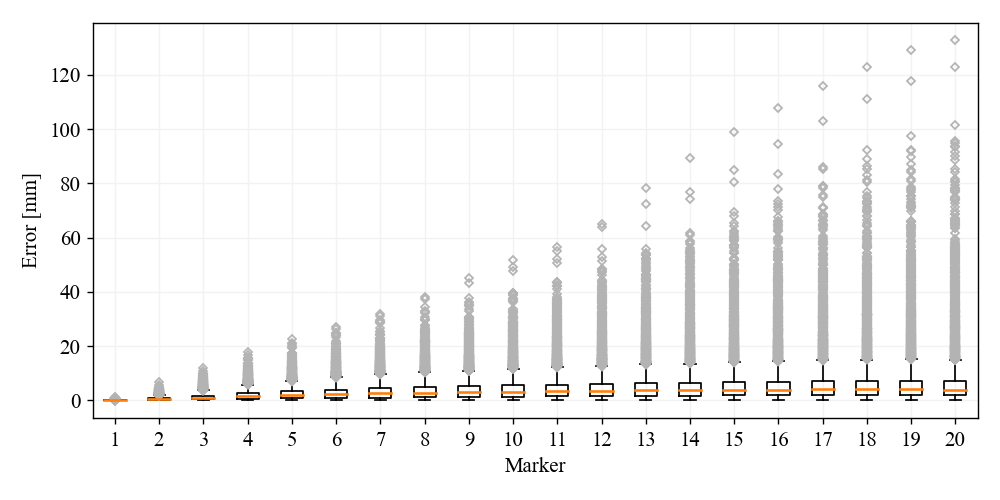

In [55]:
marker=20
index_array_random = np.argmin(EUCdis_random_Avg3Scans_train_val, axis=-1)
Tip_RMSE(y_test_rand,y_TV_rand[index_array_random],marker-1)

[5.951218901636424, 3.8817637643936447, 4.883962768532498, 516] Tip Error
[4.050647997331497, 2.9597057883653077, 3.284630124540965, 486] RMSE


<IPython.core.display.Javascript object>


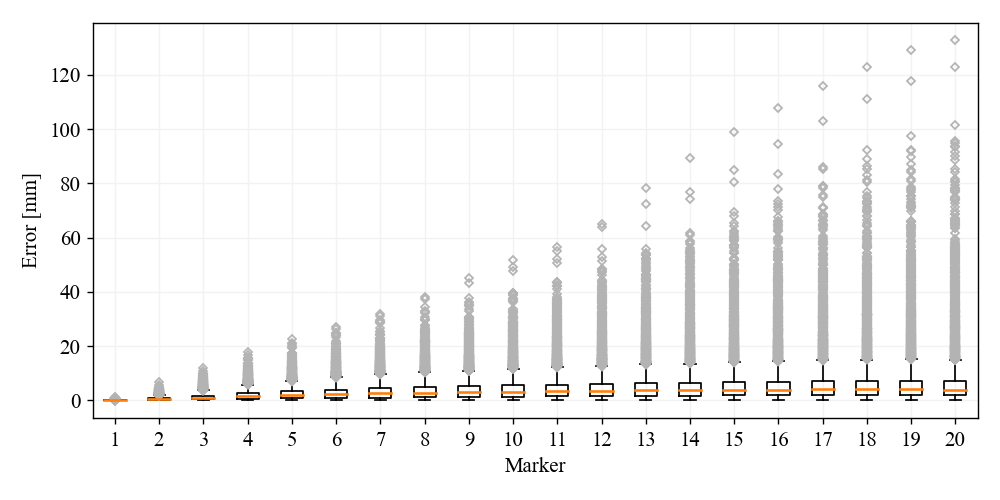

In [56]:
marker=15
index_array_random = np.argmin(EUCdis_random_Avg3Scans_train_val, axis=-1)
Tip_RMSE(y_test_rand,y_TV_rand[index_array_random],marker-1)

[69.75028135097129, 60.926537508794745, 52.40534997295524, 159] Tip Error
[40.25466661143268, 35.464513575028015, 28.17672276747234, 152] RMSE


<IPython.core.display.Javascript object>


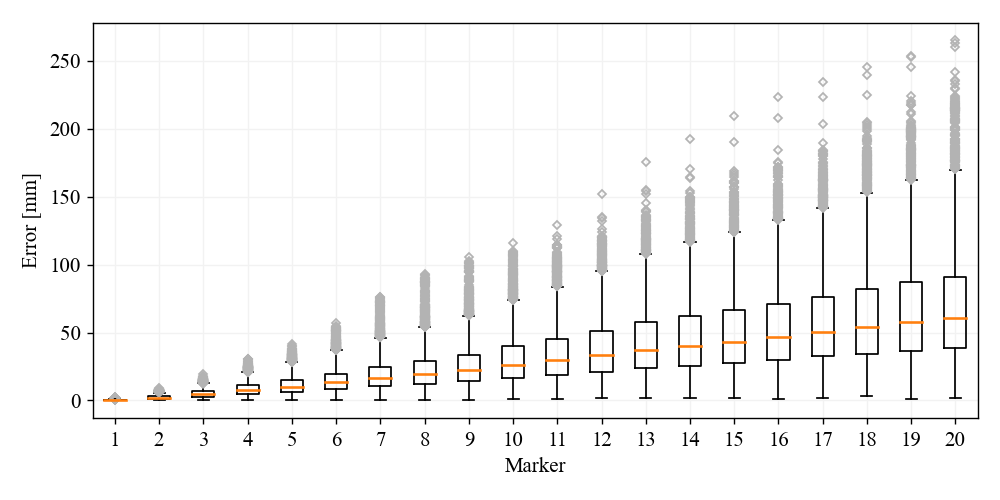

In [59]:
marker=20
index_array_3min_1 = np.argmin(EUCdis_3min_1_Avg3Scans_train_val, axis=-1)
index_array_3min_2 = np.argmin(EUCdis_3min_2_Avg3Scans_train_val, axis=-1)

label_3min_t=np.concatenate((y_TV_rand[index_array_3min_1[2200:5400]],y_TV_rand[index_array_3min_2[2700:5306]]), axis=0)
# print(label_t.shape)
y_3min_t=np.concatenate((y_3min_1[2200:5400,:],y_3min_2[2700:5306,:]), axis=0)
Tip_RMSE(y_3min_t,label_3min_t,marker-1)

[50.02581768793, 43.32671927840258, 38.49523007760931, 106] Tip Error
[28.676395419567356, 25.170623438868923, 20.874747944737955, 136] RMSE


<IPython.core.display.Javascript object>


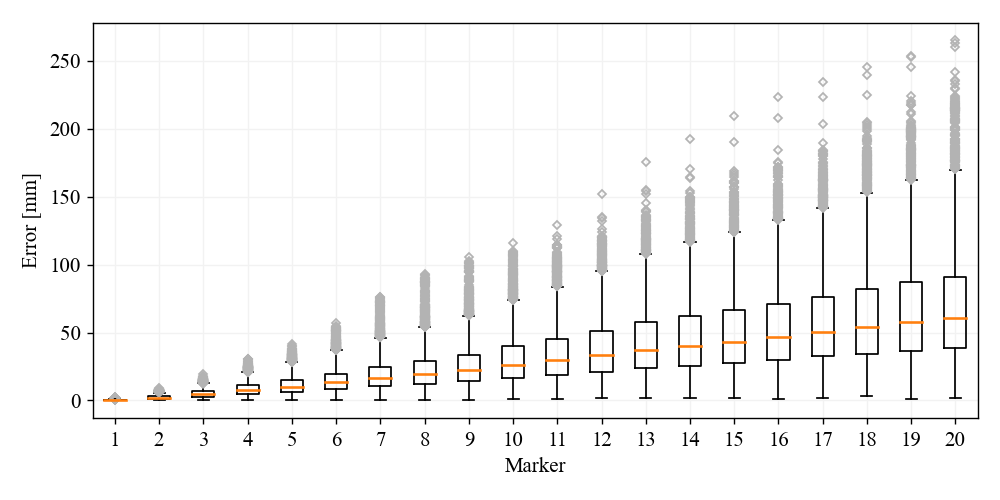

In [58]:
marker=15
Tip_RMSE(y_3min_t,label_3min_t,marker-1)

[2.6825897935086305, 2.384361118676483, 0.14348895734501754, 42] Tip Error
[1.565399741282043, 1.4647347630481105, 0.11755317536910015, 10] RMSE


<IPython.core.display.Javascript object>


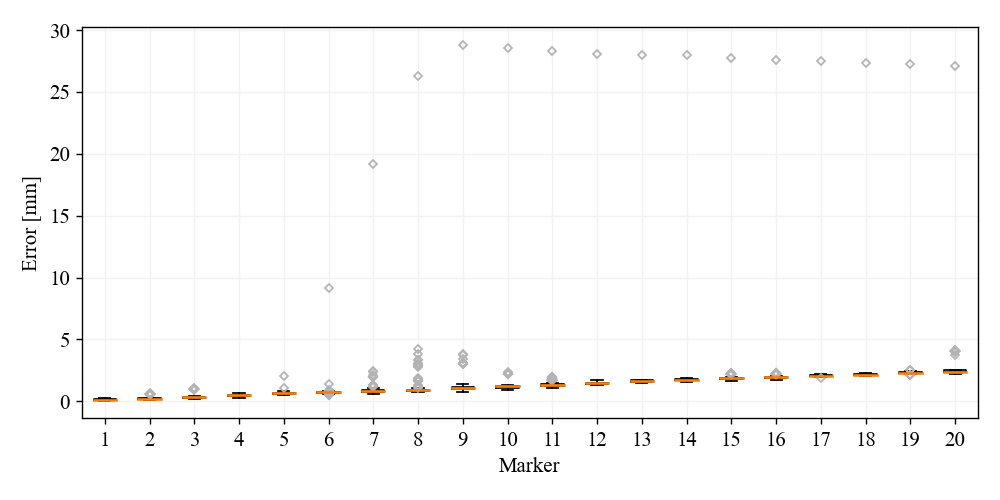

In [46]:
SelectedSamples=np.array([530,2070,770,1910,1110,1710,1320,1560])
label=y_TV_rand[index_array_3min_1]
y_template=y_3min_1
for i in range(0,len(SelectedSamples)):
    if i == 0:
        label_GT=label[SelectedSamples[i]-20:SelectedSamples[i]+20,:]
        Prediction=y_template[SelectedSamples[i]-20:SelectedSamples[i]+20,:]        
    else:
        label_GT=np.concatenate((label_GT,label[SelectedSamples[i]-20:SelectedSamples[i]+20,:]), axis=0)
        Prediction=np.concatenate((Prediction,y_template[SelectedSamples[i]-20:SelectedSamples[i]+20,:]), axis=0)
# print(np.array(label_GT).shape)    
# print(np.array(Prediction).shape)    
Tip_RMSE(Prediction,label_GT)


In [29]:
Prediction.shape

(320, 60)

<IPython.core.display.Javascript object>


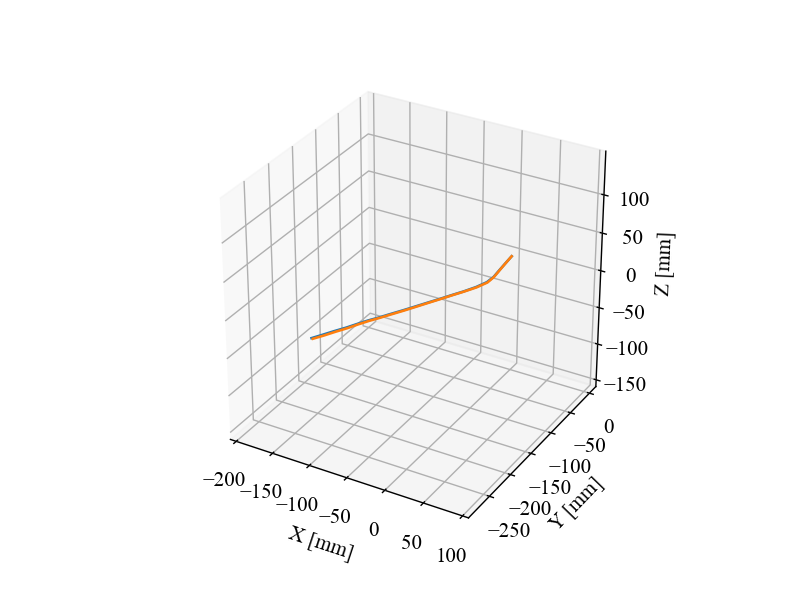

In [47]:
j=10
xyz=Prediction[j].reshape((20,3))

fig = plt.figure()
ax= fig.gca(projection='3d')
plt.ion()
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
xyz=label_GT[j].reshape((20,3))
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])

ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
fig.show() 

